C:\Users\SIR\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Iteration 1: Loss 118.32777404785156
Iteration 101: Loss 98.63557434082031
Iteration 201: Loss 98.63553619384766
Iteration 301: Loss 98.63545989990234
Iteration 401: Loss 98.63544464111328
Iteration 501: Loss 98.6353759765625
Iteration 601: Loss 98.63533782958984
Iteration 701: Loss 98.63526916503906
Iteration 801: Loss 98.63521575927734
Iteration 901: Loss 98.63516998291016
Iteration 1001: Loss 98.6351089477539
Iteration 1101: Loss 98.63507080078125
Iteration 1201: Loss 98.635009765625
Iteration 1301: Loss 98.63496398925781
Iteration 1401: Loss 98.63490295410156
Iteration 1501: Loss 98.63484954833984
Iteration 1601: Loss 98.63481903076172
Iteration 1701: Loss 98.63475036621094
Iteration 1801: Loss 98.63469696044922
Iteration 1901: Loss 98.6346435546875
Estimated Weight: [[1.3907468]]
Estimated Bias: [-0.01610934]
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


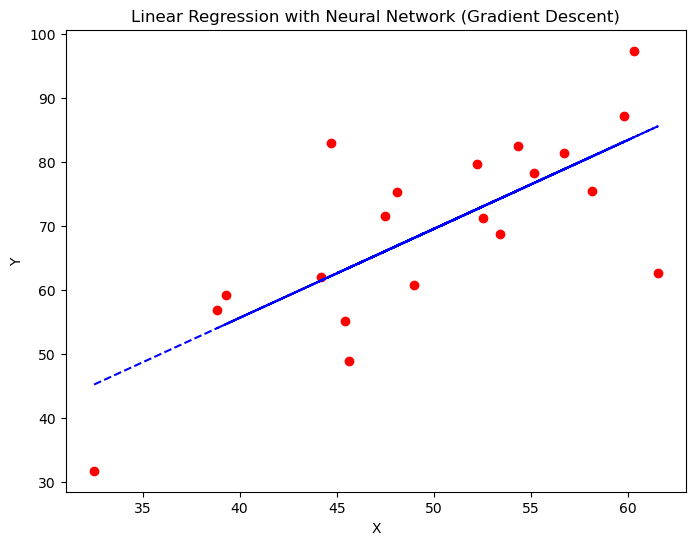

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Define mean squared error function
def mean_squared_error(y_true, y_predicted):
    return tf.reduce_mean(tf.square(y_true - y_predicted))

# Gradient Descent Function
def gradient_descent(X, y, iterations=1000, learning_rate=0.0001, stopping_threshold=1e-6):
    # Define neural network architecture
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=(1,))
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    # Training loop
    for i in range(iterations):
        with tf.GradientTape() as tape:
            y_pred = model(X)
            loss = mean_squared_error(y, y_pred)
        
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        if i % 100 == 0:
            print(f"Iteration {i+1}: Loss {loss.numpy()}")

    # Visualize the learned parameters
    weights = model.layers[0].get_weights()[0]
    bias = model.layers[0].get_weights()[1]
    print(f"Estimated Weight: {weights}\nEstimated Bias: {bias}")

    # Make predictions
    Y_pred = model.predict(X)

    # Plotting the regression line
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, marker='o', color='red')
    plt.plot(X, Y_pred, color='blue', markerfacecolor='red', markersize=10, linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Linear Regression with Neural Network (Gradient Descent)")
    plt.show()

# Main function
def main():
    # Data
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
                  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
                  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
                  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
                  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
                  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
                  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

    # Reshape data for TensorFlow
    X = X.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # Estimating weight and bias using gradient descent with neural networks
    gradient_descent(X, y, iterations=2000)

if __name__ == "__main__":
    main()


Epoch 0: Loss: 228.3922882080078
Epoch 100: Loss: 1.9042179870469628e+35
Epoch 200: Loss: inf
Epoch 300: Loss: nan
Epoch 400: Loss: nan
Epoch 500: Loss: nan
Epoch 600: Loss: nan
Epoch 700: Loss: nan
Epoch 800: Loss: nan
Epoch 900: Loss: nan
Trained W: [[nan]
 [nan]]
Trained b: [nan]


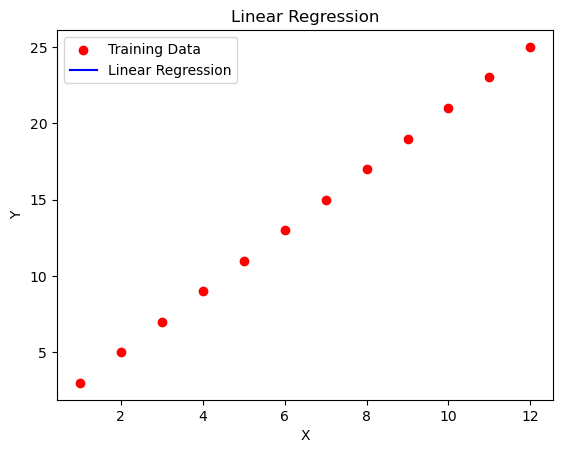

In [4]:
import tensorflow as tf

# Define the neural network model
class NeuralNetwork(tf.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # Define the parameters (weights and biases) of the neural network
        self.W = tf.Variable(tf.random.normal([2, 1]), name='weight')
        self.b = tf.Variable(tf.random.normal([1]), name='bias')
        
    def __call__(self, x):
        # Define the forward pass
        return tf.matmul(x, self.W) + self.b

# Define the loss function (mean squared error)
def loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Generate some training data
x_train = tf.constant([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0]])
y_train = tf.constant([[3.0], [5.0], [7.0], [9.0]])

# Instantiate the neural network model
model = NeuralNetwork()

# Define the learning rate and number of epochs
learning_rate = 0.01
epochs = 1000

# Train the model using gradient descent
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Forward pass
        y_pred = model(x_train)
        # Compute the loss
        current_loss = loss(y_pred, y_train)
    # Compute the gradients of the loss with respect to the model parameters
    dW, db = tape.gradient(current_loss, [model.W, model.b])
    # Update the parameters using gradient descent
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

    # Display the current loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}')

# Print the trained parameters
print("Trained W:", model.W.numpy())
print("Trained b:", model.b.numpy())
